<a href="https://colab.research.google.com/github/NQHuy2001/LearnAI/blob/main/Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyen Quang Huy 19146339
Link Data:https://drive.google.com/drive/folders/1G5wcH-WKPMQfRzpBSazX459JKnD1Zub9?usp=sharing

In [25]:
pip install mtcnn

In [36]:
import keras
import matplotlib.pyplot as plt
from mtcnn import MTCNN
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from google.colab import drive

folder1 = '/content/drive/MyDrive/Emotion/Buon/'
folder2 = '/content/drive/MyDrive/Emotion/Giandu/'
folder3 = '/content/drive/MyDrive/Emotion/Hanhphuc/'
folder4 = '/content/drive/MyDrive/Emotion/Ngacnhien/'

photos, labels = list(), list()
for file in listdir(folder1):
  if file.startswith('sad'):
    output = 0
    photo = load_img(folder1+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder2):
  if file.startswith('Angry'):
    output = 1
    photo = load_img(folder2+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder3):
  if file.startswith('Happy'):
    output = 2
    photo = load_img(folder3+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder4):
  if file.startswith('Suprise'):
    output = 3
    photo = load_img(folder4+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('emotion.npy', photos)
save('emotion.npy', labels)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64,epochs=150, verbose=1)
model.save('4emotion.h5')

(56, 150, 150, 3) (56,)
Epoch 1/150
1/1 [==============================] - 1s 648ms/step - loss: 187.1449 - accuracy: 0.0000e+00
Epoch 2/150
1/1 [==============================] - 0s 73ms/step - loss: 1001.1684 - accuracy: 0.2500
Epoch 3/150
1/1 [==============================] - 0s 64ms/step - loss: 616.8527 - accuracy: 0.3036
Epoch 4/150
1/1 [==============================] - 0s 57ms/step - loss: 523.5901 - accuracy: 0.2321
Epoch 5/150
1/1 [==============================] - 0s 58ms/step - loss: 290.1794 - accuracy: 0.2143
Epoch 6/150
1/1 [==============================] - 0s 54ms/step - loss: 51.4306 - accuracy: 0.2143
Epoch 7/150
1/1 [==============================] - 0s 57ms/step - loss: 64.7223 - accuracy: 0.3036
Epoch 8/150
1/1 [==============================] - 0s 54ms/step - loss: 34.2433 - accuracy: 0.3036
Epoch 9/150
1/1 [==============================] - 0s 55ms/step - loss: 33.3228 - accuracy: 0.2500
Epoch 10/150
1/1 [==============================] - 0s 53ms/step - loss: 1

[[0.12087245 0.1270274  0.11211991 0.11435885 0.09336501 0.09091407
  0.08648932 0.09327751 0.08559603 0.07597949]]


'Giandu'

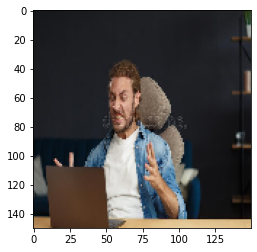

In [37]:
classes = ["Buon","Giandu","Hanhphuc", "Ngacnhien"]
img = load_img('/content/drive/MyDrive/Emotion/Giandu/Angry1.jpg', target_size=(150,150))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.12137052 0.1203104  0.12842955 0.12429178 0.09103261 0.08772904
  0.07941971 0.09013209 0.08107681 0.07620757]]


'Hanhphuc'

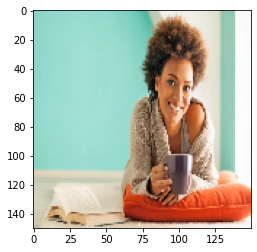

In [39]:
classes =["Buon","Giandu","Hanhphuc", "Ngacnhien"]
img = load_img('1.jpg', target_size=(150,150))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255

y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]